## The LSL Data Stream
Reading data in real-time in either Matlab or Python is not difficult, and in the following I will give an example how to read something with the OpenBCI system.

The Lab Streaming Layer information/github can be found here:
https://github.com/sccn/labstreaminglayer

You need to install LSL on the **acquisition** side (the data acquisition computer), and on the **real-time analysis** side (which is this computer). I do not talk about sender and receiver since this is confusing. The acquisition computer receives data from the EEG system (using some factory-own format), and then sends it out via LSL to another computer. The real-time computer can send and receive multiple LSL data streams, if set up properly.


Just in case you do NOT have the OpenBCI system (or other system) handy, and wish to continue - you can. We will just use the example data we have, and emulate the LSL Data stream via playback. More on that in [2_2_SignalPlayback.ipynb](2_2_SignalPlayback.ipynb). I suggest you keep on reading though.


## Acquisition
The LSL Code mentioned earlier is just the code (in C), which you need to compile in order to get something actually running. You usually wish to prevent having to compile, so there are pre-compiled binaries that you can get. You go to [ftp://sccn.ucsd.edu/pub/software/LSL/Apps/](ftp://sccn.ucsd.edu/pub/software/LSL/Apps/) and download the device you wish to use. For each separate device, there is a specific GUI which is compiled together with Lab Streaming Layer. I tested this (and got it working!) for Brain Products, EEGo Sports, and BioSemi. Eyetracker Data should also be supported, but I haven't tested it myself yet. Each system has its own idiosyncraticies. With BP, you need to start the BP Software first, and then the 'RDA' Stream, before you can start the LSL applet. With BioSemi (and EEGo Sports), you just start the LSL applet immediately. For each device, there should be a guide that is included.

### OpenBCI
For our purposes, we demonstrate things with [OpenBCI](https://www.youtube.com/watch?v=veFA0bvV-0E). OpenBCI doesn't (yet) have LSL App on the FTP site, but luckily, it does have on its [github](https://github.com/OpenBCI) page two things of main interest. The first is the [GUI](https://github.com/OpenBCI/OpenBCI_GUI), and the second is the [LSL Code](https://github.com/OpenBCI/OpenBCI_LSL).

**Connecting OpenBCI to computer**
The OpenBCI headset comes with a usb dongle and the EEG headset. How to set things up material-wise is something that is explained on the OpenBCI website, but basically they talk about how to build the EEG headset and how to plug the USB into the computer and start up the OpenBCI GUI (and what buttons and switches you should press on their [Cython board](https://shop.openbci.com/products/cyton-biosensing-board-8-channel)).

Since we are inside of a virtual machine, there are two things that need extra minding over all the other explanations.
 - The Network settings of the VM need to be set to 'Bridged Adaptor', go to Machine -> Settings -> Network(tab) -> Bridged Adaptor. Now the Virual Machine is on the same network as the host computer (so it can read in the LSL). There might be other ways but this is the most easy.
 - The USB (once inserted) needs to be attached to the VM. Go to Devices -> USB and select FTDI FT231X USB UART \[1000\] (or similar number).

### Checking the signals: Starting OpenBCI_GUI

Now that things are properly connected, we can first start the OpenBCI_GUI:
```console
(base) rt@rt-VirtualBox:~$ cd nf
(base) rt@rt-VirtualBox:~/nf$ cd OpenBCI_GUI 
(base) rt@rt-VirtualBox:~/nf/OpenBCI_GUI$ ./OpenBCI_GUI
```
(The ./ means that you tell bash that the executable is in *this* directory. As a convention this needs to be explicitly specified, unless the path of the executable is set in the an environment variable (\$PATH), or in /bin directory)

This should produce the GUI, where we should be able to see the USB0:

![](pics/OpenBCI_GUI_1.png)

Click start/select and then you can take a look at the signals as they are coming in. This option should *usually* work (although something it didn't). There are a lot of buttons and options to try out in this GUI, and as a bonus it also enables to send the LSL stream (or other type of streams) directly from the GUI. If anything, it is a good way to do initial check on your signals (and potentially adjust the EEG headset to lower resistances / improve signals).

### start up the EEG
make sure that the EEG is tested  
that the switch on the USB dongle is at GPOI6  
that the switch on the back of the EEG cap is in 'up' position  
that the latency times is set properly [windows](https://openbci.com/forum/index.php?p=/discussion/198/timing-marks-buffering-delays-etc) or [linux](https://askubuntu.com/questions/696593/reduce-request-latency-on-an-ftdi-ubs-to-rs-232-adapter)  
`echo 1 | sudo tee /sys/bus/usb-serial/devices/ttyUSB0/latency_timer`

Then open a terminal  
cd to ~/nf/openBCI_LSL  
then type:  
`python openbci_lsl.py -- stream`

followed by:

`/start`

### Starting the LSL Stream: OpenBCI_LSL
The OpenBCI_GUI (when maximized) does take a lot of system resources. There is another, command-line, utility that allows to send the LSL data stream with less setup required.

```console
(base) rt@rt-VirtualBox:~$ conda activate rt
(rt) rt@rt-VirtualBox:~$ cd nf
(rt) rt@rt-VirtualBox:~/nf$ cd OpenBCI_LSL 
(rt) rt@rt-VirtualBox:~/nf/OpenBCI_GUI$ python openbci_lsl.py --stream
```
(see that we went into the rt environment because openbci_lsl is a python script we wish to run)

The output should be something like:
```console
-------INSTANTIATING BOARD-------
Connecting to V3 at port /dev/ttyUSB0
Serial established...
OpenBCI V3 8-16 channel
On Board ADS1299 Device ID: 0x3E
LIS3DH Device ID: 0x33
Firmware: v3.1.2
...
--------------------------------------
LSL Configuration: 
  Stream 1: 
      Name: openbci_eeg 
      Type: EEG 
      Channel Count: 8
      Sampling Rate: 250.0
      Channel Format: float32 
      Source Id: openbci_eeg_id29 
  Stream 2: 
      Name: openbci_aux 
      Type: AUX 
      Channel Count: 3
      Sampling Rate: 250.0
      Channel Format: float32 
      Source Id: openbci_aux_id29 

Electrode Location Montage:
['Fp1', 'Fp2', 'C3', 'C4', 'T5', 'T6', 'O1', 'O2']
---------------------------------------

--------------INFO---------------
Commands: 
    Type "/start" to stream to LSL 
    Type "/stop" to stop stream.
    Type "/exit" to disconnect the board. 
Advanced command map available at http://docs.openbci.com

-------------BEGIN---------------

--> 
```

The information is already written here: There will be 2 streams, 1 for the EEG, 1 for the Accelerometer (it has an accelerometer!)
to begin streaming, do as told, type start

```console
--> /start
```

The output should be:

```console
Streaming data...

-->
```
Now the LSL Data Stream(s) have started and they continuously send out data (but... not yet). What it does it 'broadcasts' the availability of streams to any computer that uses LSL to ask 'are there any LSL Data Streams on this network?'. More on this later.

The LSL Data Stream does not take a lot of computational resources.





### Reading the LSL Data Stream

So now that the LSL Data Stream is up and running, we wish to be able to access it, grab some data, and inspect it -- in Python, inside of *this* notebook. We therefore also need LSL to receive data. Luckily in python, LSL is already pre-packaged and can be installed (already is installed in the Virtual Machine) easily. See [1_1_CreateRTEnvironment.ipynb](1_1_CreateRTEnvironment.ipynb)

The following code-blocks show you how to work with pylsl to brab stuff from the data stream. This is taken from the tutorials found in the LSL github web page [here](https://github.com/sccn/labstreaminglayer/wiki/ExampleCode), scroll all the way down to subsection Python Example [https://github.com/labstreaminglayer/liblsl-Python/blob/master/pylsl/examples/ReceiveData.py](https://github.com/labstreaminglayer/liblsl-Python/blob/master/pylsl/examples/ReceiveData.py)

```python
"""Example program to show how to read a multi-channel time series from LSL."""

from pylsl import StreamInlet, resolve_stream

# first resolve an EEG stream on the lab network
print("looking for an EEG stream...")
streams = resolve_stream('type', 'EEG')

# create a new inlet to read from the stream
inlet = StreamInlet(streams[0])

while True:
    # get a new sample (you can also omit the timestamp part if you're not
    # interested in it)
    sample, timestamp = inlet.pull_sample()
    print(timestamp, sample)
```

... with the LSL stream running, let's try it... we will do some things differently, but all are standard Python commands

In [57]:
# import the pylsl
import pylsl

In [58]:
# what's in pylsl?
print(dir(pylsl))


['ContinuousResolver', 'DEDUCED_TIMESTAMP', 'FOREVER', 'IRREGULAR_RATE', 'InternalError', 'InvalidArgumentError', 'LostError', 'StreamInfo', 'StreamInlet', 'StreamOutlet', 'TimeoutError', 'XMLElement', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'cf_double64', 'cf_float32', 'cf_int16', 'cf_int32', 'cf_int64', 'cf_int8', 'cf_string', 'cf_undefined', 'library_version', 'local_clock', 'lost_error', 'proc_ALL', 'proc_clocksync', 'proc_dejitter', 'proc_monotonize', 'proc_none', 'proc_threadsafe', 'protocol_version', 'pylsl', 'resolve_bypred', 'resolve_byprop', 'resolve_stream', 'resolve_streams', 'stream_info', 'stream_inlet', 'stream_outlet', 'timeout_error', 'vectorc', 'vectord', 'vectorf', 'vectori', 'vectorl', 'vectors', 'vectorstr', 'xml_element']


In [59]:
# check out the streams currently on this network (could be the wireless one if a laptop, or the wired if a desktop connected to the institute)
streams=pylsl.resolve_streams()

print(streams)

[<pylsl.pylsl.StreamInfo object at 0x7fa8c634bac8>, <pylsl.pylsl.StreamInfo object at 0x7fa8c635c940>]


In [60]:
# so there should be 2 streams, as specified also by the openBCI_LSL.
# we get some information from the first stream. But I do not know what to do or what methods there are! So, we use dir()
print(dir(streams[0]))

['__class__', '__del__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'as_xml', 'channel_count', 'channel_format', 'created_at', 'desc', 'hostname', 'name', 'nominal_srate', 'obj', 'session_id', 'source_id', 'type', 'uid', 'version']


In [61]:
len(streams)

2

In [62]:
# the name and channel_count, nominal_srate seem to be useful. Let's try those, we assume they are methods, so we call em with ():]
# I don't know what channel_format is, so we also try that:
print('name = %s' % streams[0].name())
print('nominal_srate = %d' % streams[0].nominal_srate())
print('channel_count = %d' % streams[0].channel_count())
print('channel_format = %d' % streams[0].channel_format())

name = openbci_aux
nominal_srate = 125
channel_count = 3
channel_format = 1


In [63]:
# also do the same for the second stream (if you have it!)
print('name = %s' % streams[1].name())
print('nominal_srate = %d' % streams[1].nominal_srate())
print('channel_count = %d' % streams[1].channel_count())
print('channel_format = %d' % streams[1].channel_format())


name = openbci_eeg
nominal_srate = 125
channel_count = 16
channel_format = 1


In [64]:
# so as told, 1 EEG stream and 1 AUX Stream (motion)
# now we do as the tutorial tells us - we tell the LSL 'server' to open up a stream for us so we can pull data from it.
# we will do the EEG stream(0)
inlet = pylsl.StreamInlet(streams[1])

In [65]:
# so what is in inlet?
print(dir(inlet))

['__class__', '__del__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'buffers', 'channel_count', 'channel_format', 'close_stream', 'do_pull_chunk', 'do_pull_sample', 'info', 'obj', 'open_stream', 'pull_chunk', 'pull_sample', 'sample', 'sample_type', 'samples_available', 'time_correction', 'value_type', 'was_clock_reset']


In [66]:
# let's try pull_chunk
data = inlet.pull_chunk()

In [67]:
# and what is this data?
data

([], [])

In [68]:
#hmm, nothing? Let's try it again:
data = inlet.pull_chunk()

In [69]:
# print(data)

In [70]:
#... that's a lot of data. 
# Probably a bit too much to be easily digestible.
# We can possibly pull a smaller chunk, but then the whole purpose of real-time would be out of the window.
print(len(data))
print(len(data[0]))
print(len(data[1]))

2
210
210


In [71]:
# so we can conclude that data is a list of 2 elements, and each element of that list is another list, of 1024 elements.
# let's reduce the complexity to (only) the last 3 elements

newdata=[data[0][-3:],data[1][-3:]]

In [72]:
newdata

[[[-185138.0,
   -152164.9375,
   -187500.015625,
   -170279.90625,
   -187500.015625,
   -153130.609375,
   -165419.46875,
   -173244.8125,
   -152223.40625,
   -163139.078125,
   -151197.453125,
   -152386.453125,
   -151629.046875,
   -152357.484375,
   -152253.40625,
   -187500.015625],
  [-185170.359375,
   -152303.9375,
   -187500.015625,
   -170299.890625,
   -187500.015625,
   -152522.96875,
   -165366.765625,
   -173187.90625,
   -151932.109375,
   -163138.0,
   -151075.78125,
   -152065.109375,
   -152207.875,
   -152167.796875,
   -152200.34375,
   -187500.015625],
  [-185152.59375,
   -152224.515625,
   -187500.015625,
   -170294.8125,
   -187500.015625,
   -152722.71875,
   -165372.25,
   -173201.09375,
   -152397.53125,
   -163141.046875,
   -151631.15625,
   -152989.265625,
   -151794.546875,
   -152399.421875,
   -152179.765625,
   -187500.015625]],
 [4565.838924589, 4565.840282611, 4565.84146814]]

In [73]:
# so the first element is likely the channel data (right now we use only 8 channels), and the second element must be the times!
# let's use numpy to make this into a nicer, more sane, 2D data array.

import numpy as np

In [74]:
# We can specify data and times like this, because inlet.pull_chunk yields a list of 2 elements. 
# (Multiple output allocation is also a feature in Matlab.)
data, times = inlet.pull_chunk()
data = np.asarray(data)

In [75]:
print('Data Matrix Shape of this chunk of data is %d by %d' % data.shape)
print('Numer of timepoints in this chunk of data is %d (sanity check)' % len(times))

Data Matrix Shape of this chunk of data is 1024 by 16
Numer of timepoints in this chunk of data is 1024 (sanity check)


In [76]:
# and, as final bonus, let us try to grab data for 10 consecutive seconds... things get a bit confusing here since time is a python-inherent
# library for timing functions, while times is our own-created variable. There is the risk of confusion.. But, this is also the case in matlab
# we go ahead...
# anther confusion, perhaps, is that we reshape things as a np array with the same variable.
import time

start_time = time.time()
data_timepoints = []

while time.time() - start_time < 10:
    time.sleep(0.010)
    data, times = inlet.pull_chunk()
    data = np.asarray(data)
    data_timepoints.append(len(times))

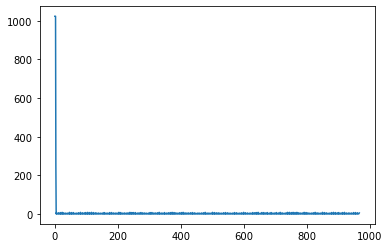

In [77]:
# we could have printed the sizes.. but, it produces too much output. # make a graph instead...
import matplotlib.pyplot as plt

plt.plot(data_timepoints[:])

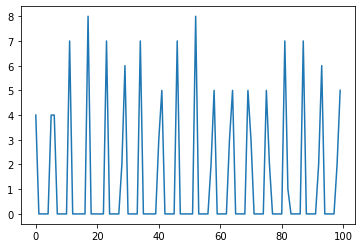

In [78]:
# let's zoom in a bit onto the end:
plt.plot(data_timepoints[-100:])

In [79]:
# So you see, we are getting data. The size is usually 0 (no new data to be had), and sometimes it is 15.
# that might mean LSL (or the OpenBCI_LSL) sends off data about once each 60 microseconds.
15 / 250

0.06

In [80]:
# how does pull_sample work?
inlet.pull_sample()

([-184178.796875,
  -154889.828125,
  -184541.921875,
  -169076.953125,
  -187500.015625,
  -155436.515625,
  -164282.578125,
  -174210.765625,
  -155071.28125,
  -164150.5,
  -154097.515625,
  -155258.296875,
  -154317.1875,
  -154856.421875,
  -154844.265625,
  -187500.015625],
 4610.562102015)

In [81]:
# so, it is 1 data point of data + the time.

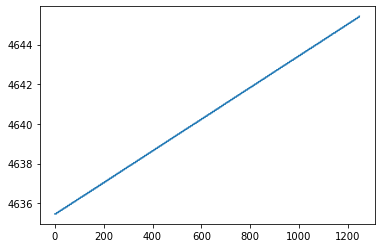

In [82]:
# is this the same as when we pull per sample? + the full code for python to pull stuff from pylsl and plot it:
# instead of asking how many elements in times, now we will append the times themselves to the list
# also, we do a bit of more diagnostics on the LSL data stream here.

import pylsl
import matplotlib.pyplot as plt
import numpy as np
import time


streams=pylsl.resolve_streams()
inlet=pylsl.stream_inlet(streams[0])


start_time = time.time()
data_timepoints = []
call_times = []

while time.time() - start_time < 10:
    
    before_time = time.time()
    data, times = inlet.pull_sample()
    after_time = time.time()
    
    this_call_lasted = after_time - before_time
    
    data = np.asarray(data)
        
    # print(times)
    data_timepoints.append(times)
    call_times.append(this_call_lasted)

plt.plot(data_timepoints)


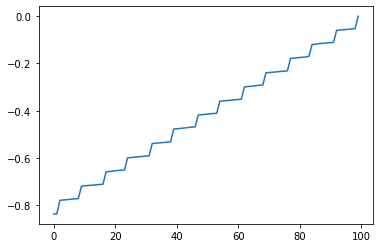

In [85]:
plt.plot(np.asarray(data_timepoints[-100:]) - data_timepoints[-1])

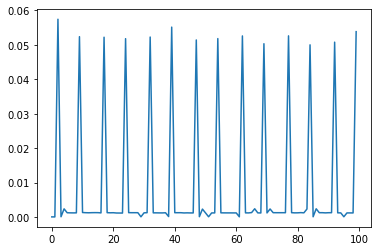

In [86]:
plt.plot(call_times[-100:])

This looks very interesting... let's check the last 100 elements, again, and do some magic to make the times themselves more readable:
What happens here is that the pull_sample will jam/hold python until new data has come in.

and it will wait about 16 samples, which is about 60 miliseconds, until new data has arrived.
this means, for BCI approaches, we should consider on average a 60-msec delay from the Device (or perhaps 30)

## Summary

There is a lot to take in here, but the most important aspect is that you can connect an EEG system, and stream the data into python. And by extension, into this notebook.

The core of the lab streaming layer 'way' of doing NF/BCI is:

```python
import pylsl

streams=pylsl.resolve_streams()

inlet=pylsl.stream_inlet(streams[0])  # which stream it is - depends on your device and settings

while True:  # as long as we do NF
    
    data, times = inlet.pull_chunk()  # or pull_sample
    
    # then we process data
    
    # then we communicate the outcome of the processed data to the stimulus setup
```
    
    

So we can go onwards to [3_1_Strategy.ipynb](3_1_Strategy.ipynb)
Or, if you wish to playback an older recording (such as the example data), go to [2_2_SignalPlayback.ipynb](2_2_SignalPlayback.ipynb)




[More information on LSL](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=4&ved=2ahUKEwjt8I3ozIvlAhXRe30KHWr9D5wQFjADegQIBRAH&url=ftp%3A%2F%2Fsccn.ucsd.edu%2Fpub%2Fbcilab%2Fpresentations%2F2012-11-14a%2520TNM%2520Talk.pdf&usg=AOvVaw3aglT_F3Itsd4pl09eIx9G)

[LSL Help](https://github.com/sccn/labstreaminglayer/wiki/Tutorial-1:-Getting-started-with-LSL-single-stream)

[LSL Youtube video](https://www.youtube.com/watch?v=Y1at7yrcFW0)

